In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn as skl
import tensorflow as tf
import pickle

In [2]:
df = pd.read_csv('NBA_Playoffs.csv')
df = df.iloc[:,3:15].iloc[1:,:]
df

,Home,ML,Percent Bet ML,Spread,Percent Bet Spread,Odds of Spread,O/U,Percent Bet O/U,Odds of O/U,ML WL,Spread WL,O/U WL
1,0.0,-240.0,83.0,-5.5,66.0,-110.0,208.0,56.0,-110.0,1.0,1.0,0.0
2,1.0,194.0,17.0,5.5,34.0,-110.0,208.0,44.0,-110.0,0.0,0.0,1.0
3,0.0,220.0,9.0,6.5,33.0,-110.0,237.5,75.0,-110.0,1.0,1.0,1.0
4,1.0,-270.0,91.0,-6.5,67.0,-110.0,237.5,25.0,-110.0,0.0,0.0,0.0
5,0.0,166.0,15.0,5.0,48.0,-110.0,215.5,48.0,-110.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
118,1.0,-124.0,38.0,-1.5,44.0,-110.0,213.5,53.0,-110.0,0.0,0.0,0.0
119,0.0,245.0,14.0,7.0,34.0,-110.0,215.0,30.0,-110.0,0.0,0.0,0.0
120,1.0,-300.0,86.0,-7.0,66.0,-110.0,215.0,70.0,-110.0,1.0,1.0,1.0
121,0.0,130.0,33.0,3.0,38.0,-110.0,208.0,40.0,-110.0,0.0,0.0,0.0


In [3]:
num_rows = df.index.stop

In [4]:
home = []
away = []

for i in np.arange(num_rows-1):
    val = df.iloc[i,0]
    
    if val == 1.0:
        home.append(1)
        away.append(0)
    
    else:
        home.append(0)
        away.append(1)
    


In [5]:
df['home'] = home
df['away'] = away
df = df.drop(columns=['Home'])
df

,ML,Percent Bet ML,Spread,Percent Bet Spread,Odds of Spread,O/U,Percent Bet O/U,Odds of O/U,ML WL,Spread WL,O/U WL,home,away
1,-240.0,83.0,-5.5,66.0,-110.0,208.0,56.0,-110.0,1.0,1.0,0.0,0,1
2,194.0,17.0,5.5,34.0,-110.0,208.0,44.0,-110.0,0.0,0.0,1.0,1,0
3,220.0,9.0,6.5,33.0,-110.0,237.5,75.0,-110.0,1.0,1.0,1.0,0,1
4,-270.0,91.0,-6.5,67.0,-110.0,237.5,25.0,-110.0,0.0,0.0,0.0,1,0
5,166.0,15.0,5.0,48.0,-110.0,215.5,48.0,-110.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-124.0,38.0,-1.5,44.0,-110.0,213.5,53.0,-110.0,0.0,0.0,0.0,1,0
119,245.0,14.0,7.0,34.0,-110.0,215.0,30.0,-110.0,0.0,0.0,0.0,0,1
120,-300.0,86.0,-7.0,66.0,-110.0,215.0,70.0,-110.0,1.0,1.0,1.0,1,0
121,130.0,33.0,3.0,38.0,-110.0,208.0,40.0,-110.0,0.0,0.0,0.0,0,1


In [6]:
df = df[['Percent Bet ML','ML','Percent Bet Spread','Spread','Odds of Spread','Percent Bet O/U','O/U','Odds of O/U','away','home','ML WL','Spread WL','O/U WL']]
df

,Percent Bet ML,ML,Percent Bet Spread,Spread,Odds of Spread,Percent Bet O/U,O/U,Odds of O/U,away,home,ML WL,Spread WL,O/U WL
1,83.0,-240.0,66.0,-5.5,-110.0,56.0,208.0,-110.0,1,0,1.0,1.0,0.0
2,17.0,194.0,34.0,5.5,-110.0,44.0,208.0,-110.0,0,1,0.0,0.0,1.0
3,9.0,220.0,33.0,6.5,-110.0,75.0,237.5,-110.0,1,0,1.0,1.0,1.0
4,91.0,-270.0,67.0,-6.5,-110.0,25.0,237.5,-110.0,0,1,0.0,0.0,0.0
5,15.0,166.0,48.0,5.0,-110.0,48.0,215.5,-110.0,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,38.0,-124.0,44.0,-1.5,-110.0,53.0,213.5,-110.0,0,1,0.0,0.0,0.0
119,14.0,245.0,34.0,7.0,-110.0,30.0,215.0,-110.0,1,0,0.0,0.0,0.0
120,86.0,-300.0,66.0,-7.0,-110.0,70.0,215.0,-110.0,0,1,1.0,1.0,1.0
121,33.0,130.0,38.0,3.0,-110.0,40.0,208.0,-110.0,1,0,0.0,0.0,0.0


# Import In Models and Scaler Objects

In [7]:
ML_model = tf.keras.models.load_model('Models/nn_model_ML.h5')
spread_model = tf.keras.models.load_model('Models/nn_model_spread.h5') 
OU_model = tf.keras.models.load_model('Models/nn_model_OU.h5')

ML_scaler = pickle.load(open('Models/scaler_ML.pkl','rb'))
spread_scaler = pickle.load(open('Models/scaler_spread.pkl','rb'))
OU_scaler = pickle.load(open('Models/scaler_OU.pkl','rb'))

2022-05-11 17:44:29.883919: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#ML_scaled = ML_scaler.transform(model_input)
#spread_scaled = spread_scaler.transform(model_input)
#OU_scaled = OU_scaler.transform(model_input)

In [9]:
num_rows = df.index.stop

# Moneyline

In [10]:
df_ML = df.copy()
df_ML = df_ML.drop(columns=['Spread WL','O/U WL'],axis=1)
ml_wl = df_ML['ML WL'].values

new_ml_wl = []
for val in ml_wl:
    int_val = int(val)
    new_ml_wl.append(int_val)

df_ML['ML WL'] = new_ml_wl
df_ML


,Percent Bet ML,ML,Percent Bet Spread,Spread,Odds of Spread,Percent Bet O/U,O/U,Odds of O/U,away,home,ML WL
1,83.0,-240.0,66.0,-5.5,-110.0,56.0,208.0,-110.0,1,0,1
2,17.0,194.0,34.0,5.5,-110.0,44.0,208.0,-110.0,0,1,0
3,9.0,220.0,33.0,6.5,-110.0,75.0,237.5,-110.0,1,0,1
4,91.0,-270.0,67.0,-6.5,-110.0,25.0,237.5,-110.0,0,1,0
5,15.0,166.0,48.0,5.0,-110.0,48.0,215.5,-110.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
118,38.0,-124.0,44.0,-1.5,-110.0,53.0,213.5,-110.0,0,1,0
119,14.0,245.0,34.0,7.0,-110.0,30.0,215.0,-110.0,1,0,0
120,86.0,-300.0,66.0,-7.0,-110.0,70.0,215.0,-110.0,0,1,1
121,33.0,130.0,38.0,3.0,-110.0,40.0,208.0,-110.0,1,0,0


In [11]:
winnings_ML = []
bet = 100
ML_count = 0

for i in np.arange(num_rows-1):
    row = np.array(df_ML.iloc[i,0:10].values).reshape(1,-1)
    ML_scaled = ML_scaler.transform(row)
    ML_prediction = ML_model.predict(ML_scaled)
    ML_output = round(ML_prediction[0][0])
    
    wl = df_ML.iloc[i,10]
    
    if ML_output == 1:
        ML_count +=1
    
        if ML_output == wl:
            ml = df_ML.iloc[i,1]
            if (ml < 0):
                ml = abs(ml)
                win = (bet / ml)*100
                winnings_ML.append(win)
            else: 
                win = (ml / bet)*100
                winnings_ML.append(win)
                
        else: # ML_output != wl
            winnings_ML.append(-bet)

In [12]:
sum(winnings_ML)

747.5866897200689

# Spread

In [13]:
df_spread = df.copy()
df_spread = df_spread.drop(columns=['ML WL','O/U WL'],axis=1)
spread_wl = df_spread['Spread WL'].values

new_spread_wl = []
for val in spread_wl:
    int_val = int(val)
    new_spread_wl.append(int_val)

df_spread['Spread WL'] = new_spread_wl
df_spread



,Percent Bet ML,ML,Percent Bet Spread,Spread,Odds of Spread,Percent Bet O/U,O/U,Odds of O/U,away,home,Spread WL
1,83.0,-240.0,66.0,-5.5,-110.0,56.0,208.0,-110.0,1,0,1
2,17.0,194.0,34.0,5.5,-110.0,44.0,208.0,-110.0,0,1,0
3,9.0,220.0,33.0,6.5,-110.0,75.0,237.5,-110.0,1,0,1
4,91.0,-270.0,67.0,-6.5,-110.0,25.0,237.5,-110.0,0,1,0
5,15.0,166.0,48.0,5.0,-110.0,48.0,215.5,-110.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
118,38.0,-124.0,44.0,-1.5,-110.0,53.0,213.5,-110.0,0,1,0
119,14.0,245.0,34.0,7.0,-110.0,30.0,215.0,-110.0,1,0,0
120,86.0,-300.0,66.0,-7.0,-110.0,70.0,215.0,-110.0,0,1,1
121,33.0,130.0,38.0,3.0,-110.0,40.0,208.0,-110.0,1,0,0


In [14]:
winnings_spread = []
bet = 100
spread_count = 0

for i in np.arange(num_rows-1):
    row = np.array(df_spread.iloc[i,0:10].values).reshape(1,-1)
    spread_scaled = spread_scaler.transform(row)
    spread_prediction = spread_model.predict(spread_scaled)
    spread_output = round(spread_prediction[0][0])
    
    wl = df_spread.iloc[i,10]
    
    if spread_output == 1:
        spread_count += 1
    
        if spread_output == wl:
            ml = df_spread.iloc[i,4]
            ml = abs(ml)
            win = (bet / ml)*100
            winnings_spread.append(win)
                
        else: # spread_output != wl
            winnings_spread.append(-bet)

In [15]:
sum(winnings_spread)

136.36363636363586

# Over / Under

In [16]:
df_OU = df.copy()
df_OU = df_OU.drop(columns=['Spread WL','ML WL'],axis=1)
OU_wl = df_OU['O/U WL'].values

new_OU_wl = []
for val in OU_wl:
    int_val = int(val)
    new_OU_wl.append(int_val)

df_OU['O/U WL'] = new_OU_wl
df_OU



,Percent Bet ML,ML,Percent Bet Spread,Spread,Odds of Spread,Percent Bet O/U,O/U,Odds of O/U,away,home,O/U WL
1,83.0,-240.0,66.0,-5.5,-110.0,56.0,208.0,-110.0,1,0,0
2,17.0,194.0,34.0,5.5,-110.0,44.0,208.0,-110.0,0,1,1
3,9.0,220.0,33.0,6.5,-110.0,75.0,237.5,-110.0,1,0,1
4,91.0,-270.0,67.0,-6.5,-110.0,25.0,237.5,-110.0,0,1,0
5,15.0,166.0,48.0,5.0,-110.0,48.0,215.5,-110.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
118,38.0,-124.0,44.0,-1.5,-110.0,53.0,213.5,-110.0,0,1,0
119,14.0,245.0,34.0,7.0,-110.0,30.0,215.0,-110.0,1,0,0
120,86.0,-300.0,66.0,-7.0,-110.0,70.0,215.0,-110.0,0,1,1
121,33.0,130.0,38.0,3.0,-110.0,40.0,208.0,-110.0,1,0,0


In [17]:
winnings_OU = []
bet = 100
OU_count = 0

for i in np.arange(num_rows-1):
    row = np.array(df_OU.iloc[i,0:10].values).reshape(1,-1)
    OU_scaled = OU_scaler.transform(row)
    OU_prediction = OU_model.predict(OU_scaled)
    OU_output = round(OU_prediction[0][0])
    
    wl = df_OU.iloc[i,10]
    
    if OU_output == 1:
        OU_count += 1
    
        if OU_output == wl:
            ml = df_spread.iloc[i,7]
            ml = abs(ml)
            win = (bet / ml)*100
            winnings_OU.append(win)
                
        else: # spread_output != wl
            winnings_OU.append(-bet)

In [18]:
sum(winnings_OU)

-163.63636363636465

### TOTAL WIN/LOSS

In [41]:
total_winnings = sum(winnings_ML) + sum(winnings_spread) + sum(winnings_OU)
total_winnings

720.3139624473401

### Money Wagered

In [42]:
money_wagered = (ML_count + spread_count + OU_count)*100
money_wagered

26300

### Return on Investment 

In [46]:
roi = round((total_winnings / money_wagered)*100,2)
roi

2.74

# Figures

In [20]:
x_ML = np.arange(ML_count)
y_ML = np.cumsum(winnings_ML)

In [21]:
x_spread = np.arange(spread_count)
y_spread = np.cumsum(winnings_spread)

In [22]:
x_OU = np.arange(OU_count)
y_OU = np.cumsum(winnings_OU)

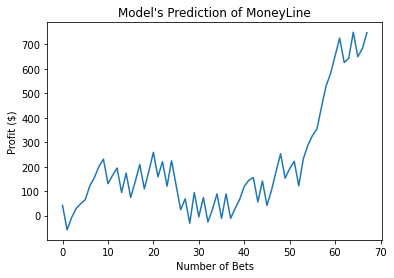

In [51]:
plt.plot(x_ML,y_ML);
plt.xlabel('Number of Bets');
plt.ylabel('Profit ($)');
plt.title("Model's Prediction of MoneyLine");

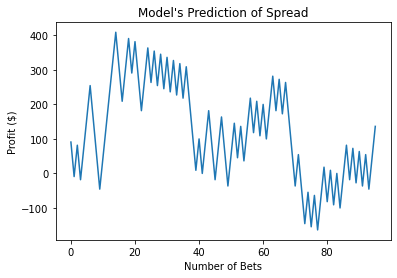

In [52]:
plt.plot(x_spread,y_spread);
plt.xlabel('Number of Bets');
plt.ylabel('Profit ($)');
plt.title("Model's Prediction of Spread");

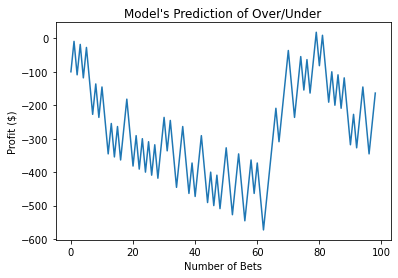

In [53]:
plt.plot(x_OU,y_OU);
plt.xlabel('Number of Bets');
plt.ylabel('Profit ($)');
plt.title("Model's Prediction of Over/Under");

# Adjusting Thresholds

## Moneyline

In [26]:
winnings_ML2 = []
bet = 100
ML_count2 = 0

for i in np.arange(num_rows-1):
    row = np.array(df_ML.iloc[i,0:10].values).reshape(1,-1)
    ML_scaled = ML_scaler.transform(row)
    ML_prediction = ML_model.predict(ML_scaled)
    ML_output = ML_prediction[0][0]
    
    wl = df_ML.iloc[i,10]
    
    if ML_output >= 0.5:
        ML_output = 1
        ML_count2 +=1
    
        if ML_output == wl:
            ml = df_ML.iloc[i,1]
            if (ml < 0):
                ml = abs(ml)
                win = (bet / ml)*100
                winnings_ML2.append(win)
            else: 
                win = (ml / bet)*100
                winnings_ML2.append(win)
                
        else: # ML_output != wl
            winnings_ML2.append(-bet)

In [27]:
sum(winnings_ML2)

747.5866897200689

## Spread

In [28]:
winnings_spread2 = []
bet = 100
spread_count2 = 0

for i in np.arange(num_rows-1):
    row = np.array(df_spread.iloc[i,0:10].values).reshape(1,-1)
    spread_scaled = spread_scaler.transform(row)
    spread_prediction = spread_model.predict(spread_scaled)
    spread_output = spread_prediction[0][0]
    
    wl = df_spread.iloc[i,10]
    
    if spread_output >= 0.7:
        spread_output = 1
        spread_count2 += 1
    
        if spread_output == wl:
            ml = df_spread.iloc[i,4]
            ml = abs(ml)
            win = (bet / ml)*100
            winnings_spread2.append(win)
                
        else: # spread_output != wl
            winnings_spread2.append(-bet)

In [29]:
sum(winnings_spread2)

1009.0909090909086

## O/U

In [30]:
winnings_OU2 = []
bet = 100
OU_count2 = 0

for i in np.arange(num_rows-1):
    row = np.array(df_OU.iloc[i,0:10].values).reshape(1,-1)
    OU_scaled = OU_scaler.transform(row)
    OU_prediction = OU_model.predict(OU_scaled)
    OU_output = OU_prediction[0][0]
    
    wl = df_OU.iloc[i,10]
    
    if OU_output >= 0.7:
        OU_output = 1
        OU_count2 += 1
    
        if OU_output == wl:
            ml = df_spread.iloc[i,7]
            ml = abs(ml)
            win = (bet / ml)*100
            winnings_OU2.append(win)
                
        else: # spread_output != wl
            winnings_OU2.append(-bet)

In [31]:
sum(winnings_OU2)

618.1818181818179

## Figures

In [32]:
x_ML2 = np.arange(ML_count2)
y_ML2 = np.cumsum(winnings_ML2)
# THRESHOLD = 0.5

In [33]:
x_spread2 = np.arange(spread_count2)
y_spread2 = np.cumsum(winnings_spread2)
# THRESHOLD = 0.7

In [34]:
x_OU2 = np.arange(OU_count2)
y_OU2 = np.cumsum(winnings_OU2)
# THRESHOLD = 0.7

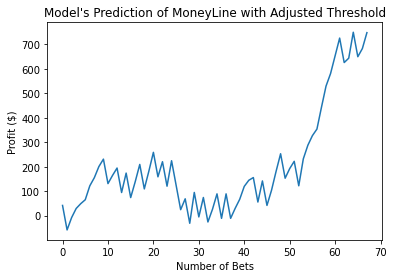

In [54]:
plt.plot(x_ML2,y_ML2);
plt.xlabel('Number of Bets');
plt.ylabel('Profit ($)');
plt.title("Model's Prediction of MoneyLine with Adjusted Threshold");

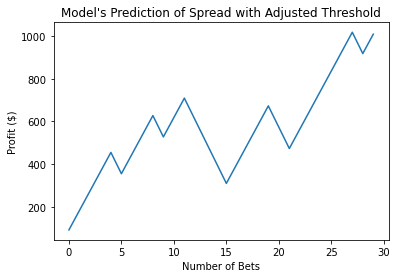

In [55]:
plt.plot(x_spread2,y_spread2);
plt.xlabel('Number of Bets');
plt.ylabel('Profit ($)');
plt.title("Model's Prediction of Spread with Adjusted Threshold");

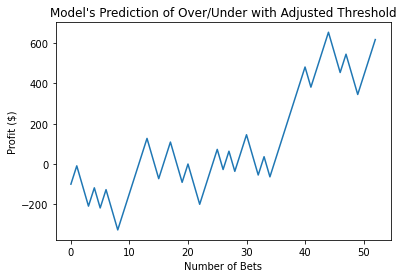

In [56]:
plt.plot(x_OU2,y_OU2);
plt.xlabel('Number of Bets');
plt.ylabel('Profit ($)');
plt.title("Model's Prediction of Over/Under with Adjusted Threshold");

### TOTAL WIN/LOSS

In [57]:
total_winnings2 = sum(winnings_ML2) + sum(winnings_spread2) + sum(winnings_OU2)
total_winnings2

2374.8594169927956

### Money Wagered

In [58]:
money_wagered2 = (ML_count2 + spread_count2 + OU_count2)*100
money_wagered2

15100

### Return on Investment

In [59]:
roi2 = round((total_winnings2 / money_wagered2)*100,2)
roi2

15.73